<a href="https://colab.research.google.com/github/noviaayualmawati/MachineLearningTask/blob/main/Skripsi/Ekperimen_untuk_SKRIPSI_Novia_Ayu_Almawati_(16214013)_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Pyhon

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')


#Data Colection

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/Chronic_Kidney_Dsease_data.csv')

#Exploratory Data Analysis

In [ ]:
# Periksa data
print(df.head())
print(df.info())
print(df.describe())
# Menampilkan jumlah baris dan kolom
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom")

   PatientID  Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel  \
0          1   71       0          0                    0               2   
1          2   34       0          0                    1               3   
2          3   80       1          1                    0               1   
3          4   40       0          2                    0               1   
4          5   43       0          1                    1               2   

         BMI  Smoking  AlcoholConsumption  PhysicalActivity  ...   Itching  \
0  31.069414        1            5.128112          1.676220  ...  7.556302   
1  29.692119        1           18.609552          8.377574  ...  6.836766   
2  37.394822        1           11.882429          9.607401  ...  2.144722   
3  31.329680        0           16.020165          0.408871  ...  7.077188   
4  23.726311        0            7.944146          0.780319  ...  3.553118   

   QualityOfLifeScore  HeavyMetalsExposure  OccupationalExposureChem

In [ ]:
print(df['Diagnosis'].value_counts())

Diagnosis
1    1524
0     135
Name: count, dtype: int64


In [ ]:
# Remove rows where any column contains 'Confidential'
# Hapus kolom 'DoctorInCharge' secara permanen
# drop Unecessary PatientID and DoctorInCharge columns  'DoctorInCharg'
df.drop(columns=['PatientID', 'DoctorInCharge'], inplace = True)

In [ ]:
# check other columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [ ]:
def plot_bar_graph(ax, df, column, title, colors):
    counts = df[column].value_counts().sort_index()
    bars = ax.bar(counts.index.astype(str), counts.values, color=colors)
    ax.set_title(title)
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')


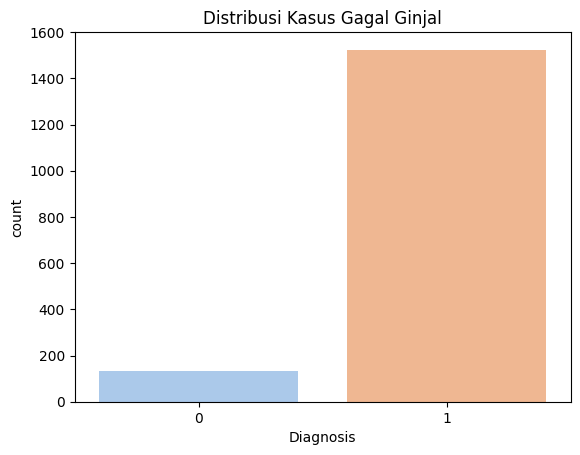

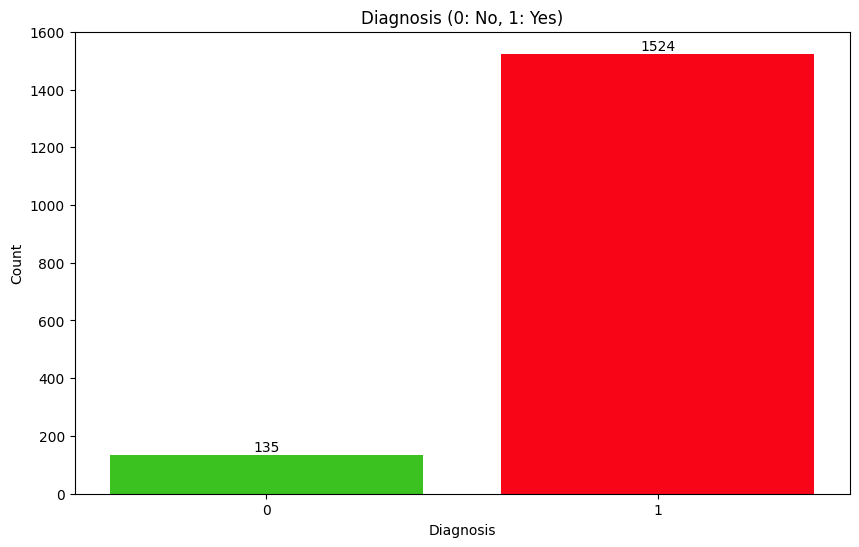

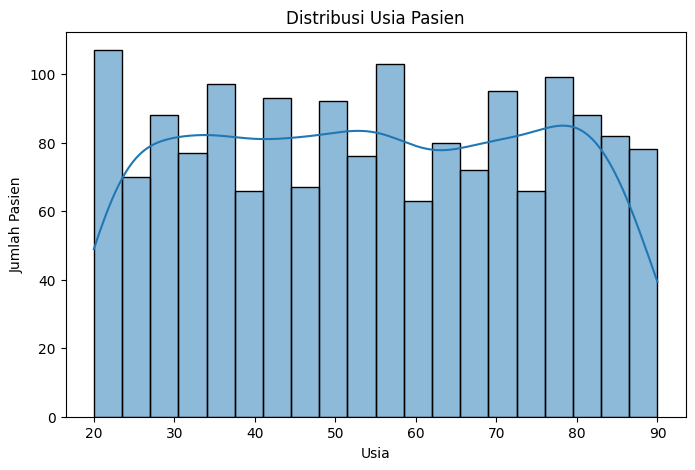

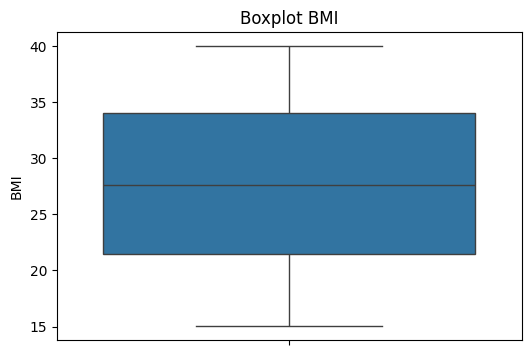

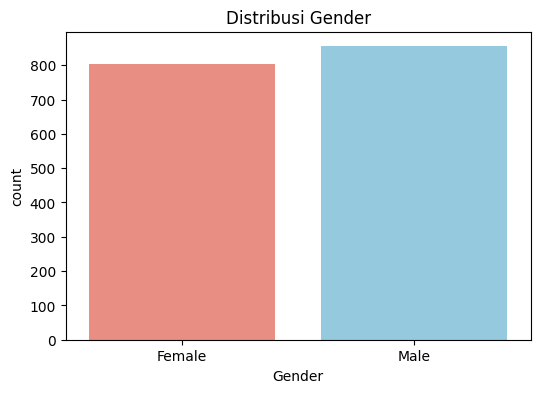

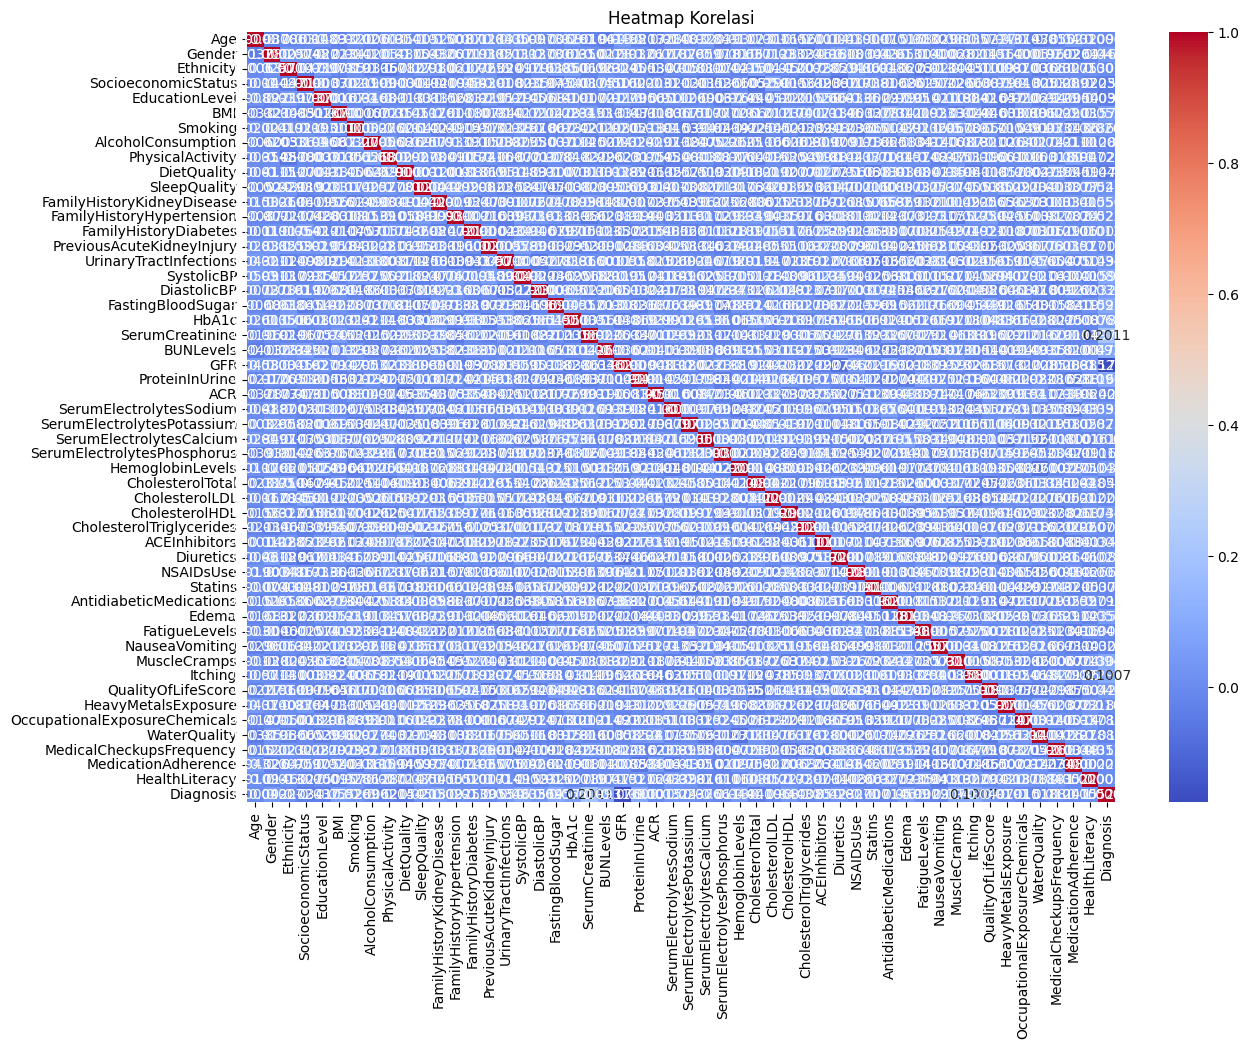

In [ ]:
# Visualisasi distribusi variabel target (asumsi kolom target bernama 'KidneyFailure')
sns.countplot(x='Diagnosis', data=df, palette='pastel')
plt.title('Distribusi Kasus Gagal Ginjal')
plt.show()

colors = ['#3BC220', '#F80517']
fig, ax = plt.subplots(figsize=(10, 6))
plot_bar_graph(ax, df, "Diagnosis", "Diagnosis (0: No, 1: Yes)", colors)
plt.show()

# Plot distribusi usia pasien
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribusi Usia Pasien')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pasien')
plt.show()

# Boxplot untuk mendeteksi outlier pada BMI
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['BMI'])
plt.title('Boxplot BMI')
plt.show()

# Countplot untuk melihat distribusi gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette={'1': 'skyblue', '0': 'salmon'})
plt.title('Distribusi Gender')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

# Plot target distribution
#plt.figure(figsize=(10, 5))
#plt.subplot(1, 2, 1)
#y_train.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
#plt.title('Original Class Distribution')
#plt.xticks([0, 1], ['Non-CKD', 'CKD'], rotation=0)

#plt.subplot(1, 2, 2)
#pd.Series(y_res).value_counts().plot(kind='bar', color=['lightgreen', 'gold'])
#plt.title('Balanced Class Distribution (After SMOTE)')
#plt.xticks([0, 1], ['Non-CKD', 'CKD'], rotation=0)
#plt.tight_layout()
#plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Heatmap Korelasi')
plt.show()
plt.show()

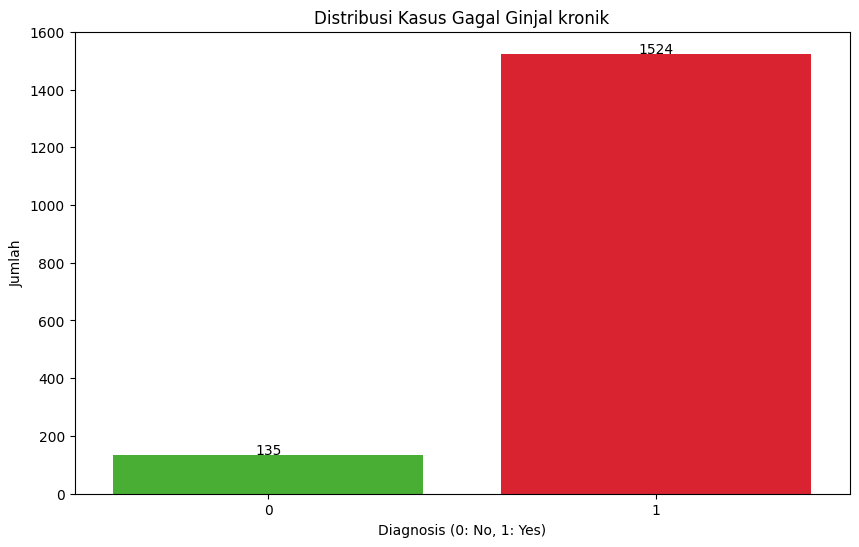

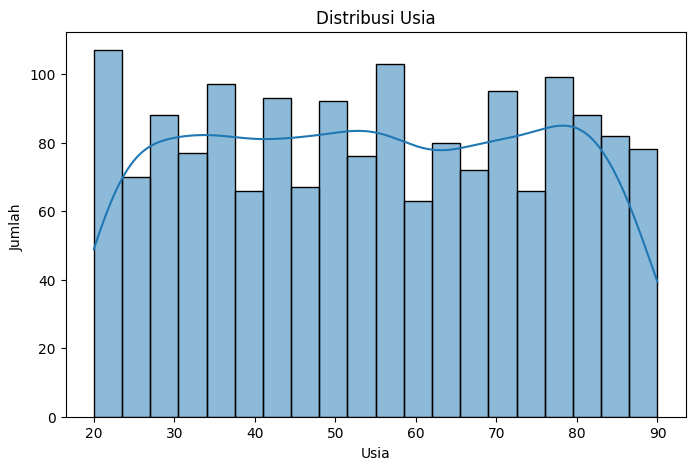

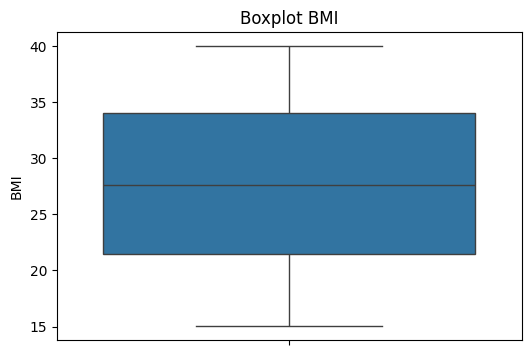

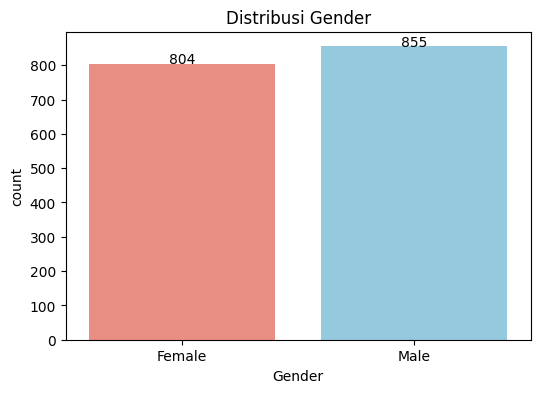

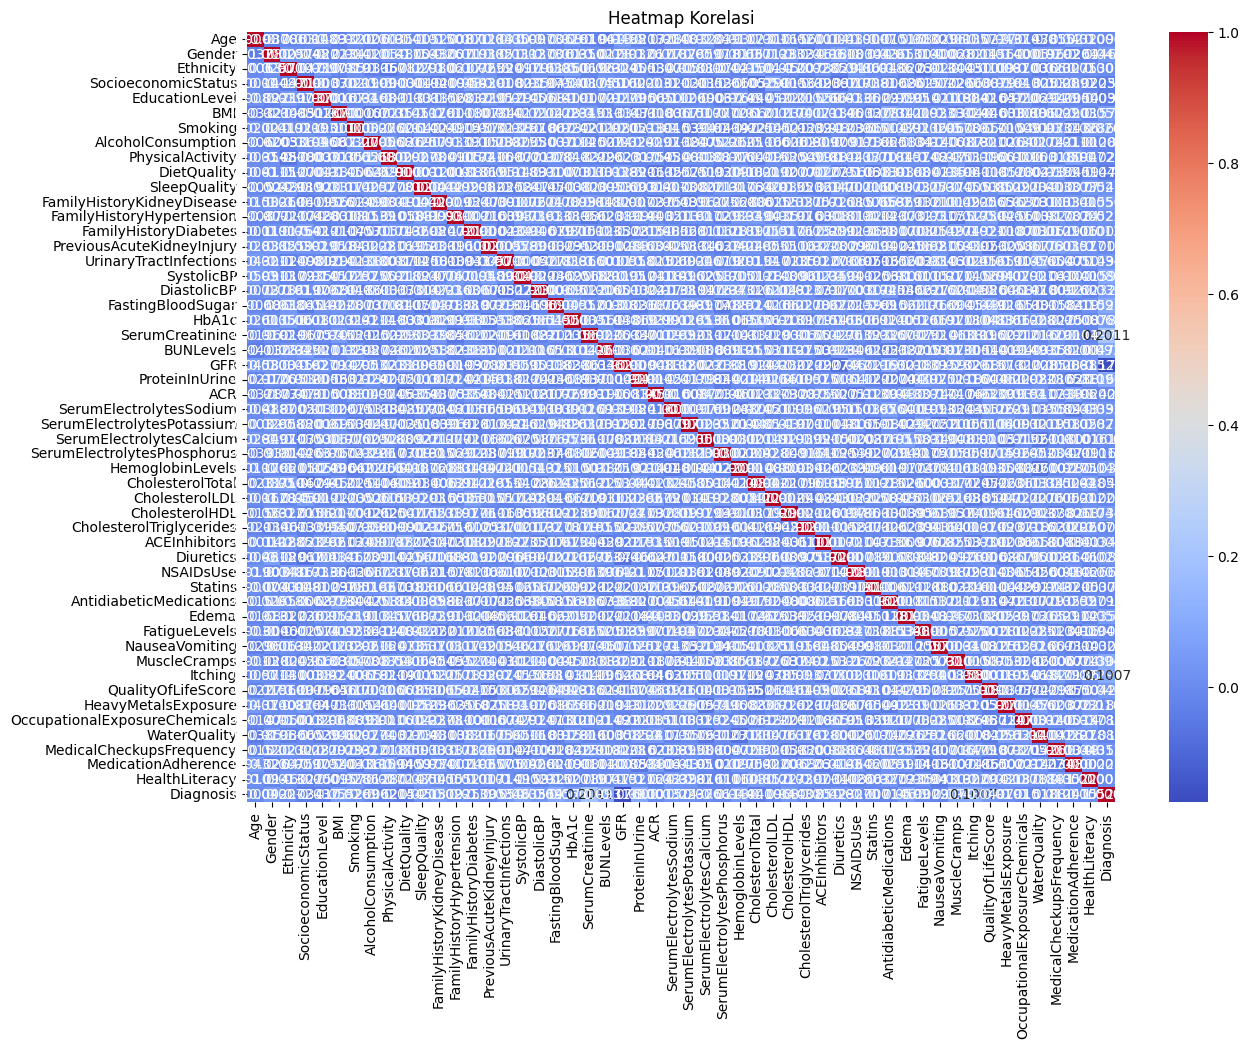

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi variabel target
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Diagnosis', data=df, palette=['#3BC220', '#F80517'])
plt.title('Distribusi Kasus Gagal Ginjal kronik')
plt.xlabel('Diagnosis (0: No, 1: Yes)')
plt.ylabel('Jumlah')

# Tambahkan angka di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5, int(height), ha="center")

plt.show()

# Plot distribusi usia pasien
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah ')
plt.show()

# Boxplot untuk mendeteksi outlier pada BMI
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['BMI'])
plt.title('Boxplot BMI')
plt.show()

# Countplot untuk melihat distribusi gender
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Gender', data=df, palette=['#FA8072', '#87CEEB'])
plt.title('Distribusi Gender')
plt.title('Distribusi Gender')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

# Tambahkan angka di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5, int(height), ha="center")

plt.show()

# (Jika ingin aktifkan plot distribusi target sebelum & sesudah SMOTE)
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# ax1 = y_train.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
# plt.title('Original Class Distribution')
# plt.xticks([0, 1], ['Non-CKD', 'CKD'], rotation=0)
# for p in ax1.patches:
#     ax1.text(p.get_x() + p.get_width()/2., p.get_height() + 0.5, int(p.get_height()), ha='center')

# plt.subplot(1, 2, 2)
# ax2 = pd.Series(y_res).value_counts().plot(kind='bar', color=['lightgreen', 'gold'])
# plt.title('Balanced Class Distribution (After SMOTE)')
# plt.xticks([0, 1], ['Non-CKD', 'CKD'], rotation=0)
# for p in ax2.patches:
#     ax2.text(p.get_x() + p.get_width()/2., p.get_height() + 0.5, int(p.get_height()), ha='center')

# plt.tight_layout()
# plt.show()

# Heatmap korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Heatmap Korelasi')
plt.show()


#Data Preprocessing

(1189, 53)


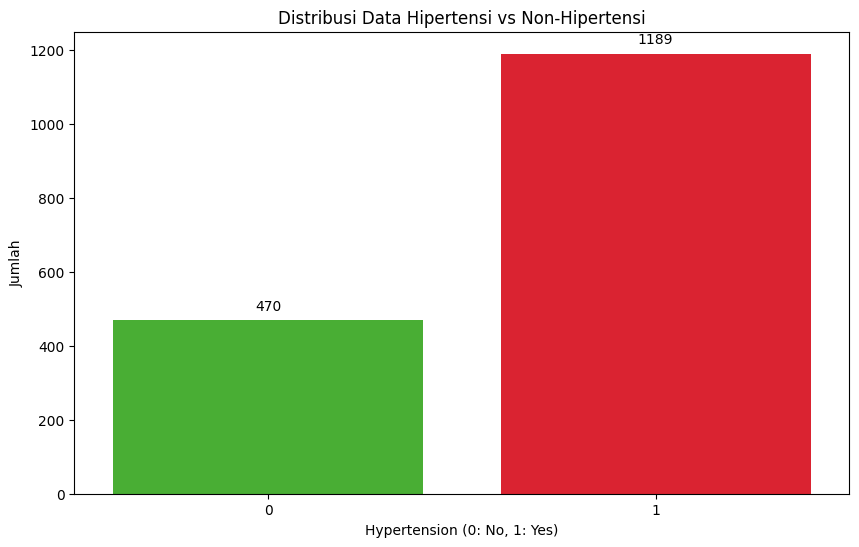

In [ ]:
# create kolom hipertensi
df['Hypertension'] = ((df['SystolicBP'] >= 140) | (df['DiastolicBP'] >= 90)).astype(int)

# Visualisasi distribusi
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Hypertension', data=df, palette=['#3BC220', '#F80517'])
plt.title('Distribusi Data Hipertensi vs Non-Hipertensi')
plt.xlabel('Hypertension (0: No, 1: Yes)')
plt.ylabel('Jumlah')

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

df_hypertension = df[df['Hypertension'] == 1].copy()
print(df_hypertension.shape)  # Cek jumlah pasien hipertensi

Diagnosis
1    1113
0      76
Name: count, dtype: int64


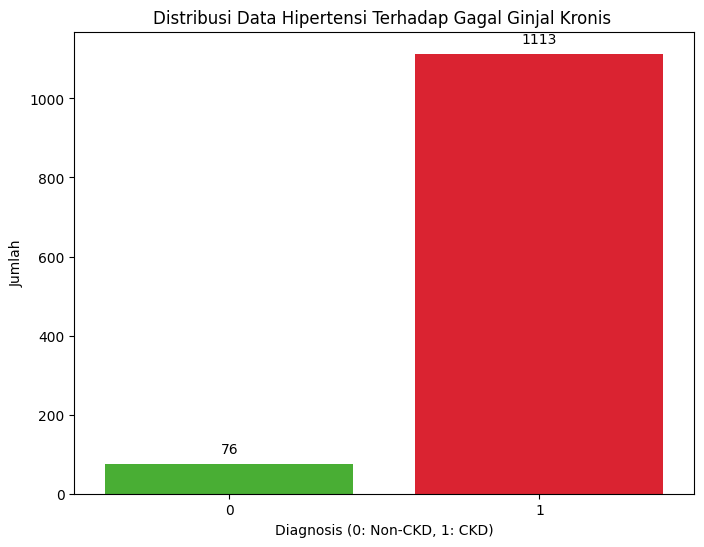

In [ ]:
# Hitung jumlah CKD dan non-CKD di antara pasien hipertensi
ckd_counts = df_hypertension['Diagnosis'].value_counts()
print(ckd_counts)

# Visualisasi distribusi CKD pada pasien hipertensi
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Diagnosis', data=df_hypertension, palette=['#3BC220', '#F80517'])
plt.title('Distribusi Data Hipertensi Terhadap Gagal Ginjal Kronis ')
plt.xlabel('Diagnosis (0: Non-CKD, 1: CKD)')
plt.ylabel('Jumlah')

# Menambahkan label jumlah di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [ ]:
# Hitung jumlah pasien hipertensi (Hypertension = 1)
jumlah_hipertensi = df['Hypertension'].sum()

# Hitung total pasien dalam dataset
total_pasien = len(df)

# Hitung persentase prevalensi hipertensi
prevalensi_hipertensi = (jumlah_hipertensi / total_pasien) * 100

# Tampilkan hasil
print(f"Jumlah pasien hipertensi: {jumlah_hipertensi}")
print(f"Total pasien: {total_pasien}")
print(f"Prevalensi Hipertensi: {prevalensi_hipertensi:.2f}%")

Jumlah pasien hipertensi: 1189
Total pasien: 1659
Prevalensi Hipertensi: 71.67%


#Tanpa SMOTE

In [ ]:
# tanpa seleksi fitur dan teknik smote
# 3. Filter hanya pasien hipertensi
df = df[df['Hypertension'] == 1]

# 4. Pisahkan fitur dan target
X = df.drop(columns=['Diagnosis'])  # ganti 'CKD' jika targetmu bernama lain
y = df['Diagnosis']

# 5. One-hot encoding jika ada kolom kategorikal
X = pd.get_dummies(X)

# 6. Split data ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 7. Latih model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 8. Prediksi dan evaluasi
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 9. Tampilkan hasil
print("=== Jumlah Data ===")
print(f"Total data: {len(df)}")
print(f"Data training: {len(X_train)}")
print(f"Data testing: {len(X_test)}")
print("\nDistribusi kelas di data testing:")
print(y_test.value_counts())

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\nAUC-ROC:", roc_auc_score(y_test, y_proba))

=== Jumlah Data ===
Total data: 1189
Data training: 951
Data testing: 238

Distribusi kelas di data testing:
Diagnosis
1    223
0     15
Name: count, dtype: int64
=== Confusion Matrix ===
[[  0  15]
 [  0 223]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.94      1.00      0.97       223

    accuracy                           0.94       238
   macro avg       0.47      0.50      0.48       238
weighted avg       0.88      0.94      0.91       238


AUC-ROC: 0.7796711509715994


#Sesudah SMOTE

=== Jumlah Data ===
Total data: 1189
Data training: 1780
Data testing: 446

Distribusi kelas di data testing:
Diagnosis
1    230
0    216
Name: count, dtype: int64

=== Confusion Matrix ===
[[214   2]
 [  5 225]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       216
           1       0.99      0.98      0.98       230

    accuracy                           0.98       446
   macro avg       0.98      0.98      0.98       446
weighted avg       0.98      0.98      0.98       446

AUC-ROC: 0.8693136070853461


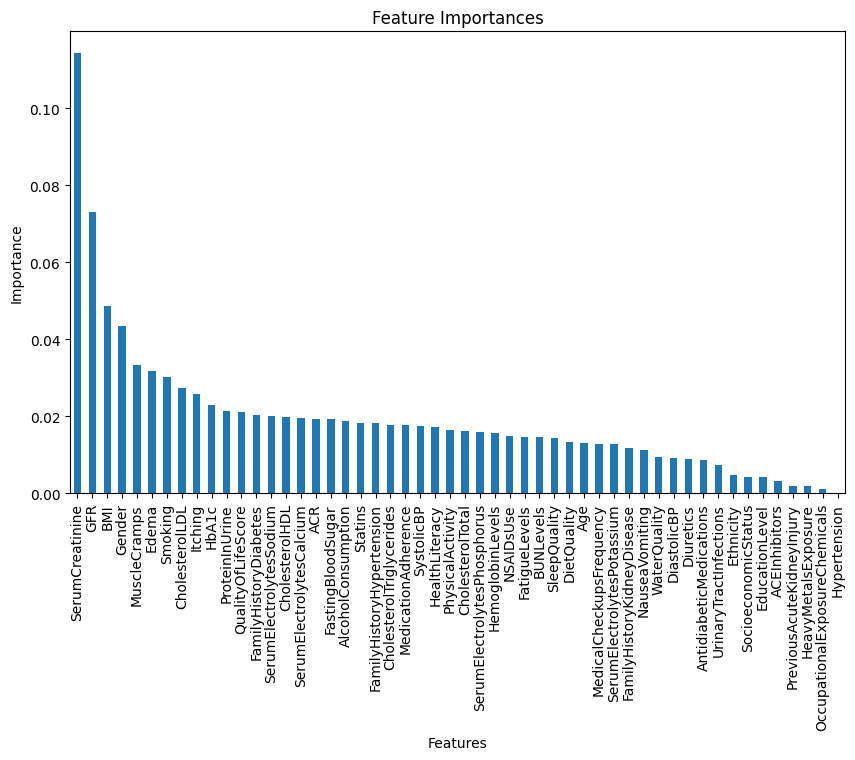

In [ ]:
# 2. Filter hanya pasien hipertensi
df = df[df['Hypertension'] == 1]

# 3. Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Diagnosis'])  # Ganti 'Diagnosis' dengan nama kolom target
y = df['Diagnosis']

smote = SMOTE()
X_res, y_res =  smote.fit_resample(X, y)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# initialize and training the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 8. Prediksi dan evaluasi
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif

# make predictions on the test set
y_pred = clf.predict(X_test)

# 9. Tampilkan hasil
print("=== Jumlah Data ===")
print(f"Total data: {len(df)}")
print(f"Data training: {len(X_train)}")
print(f"Data testing: {len(X_test)}")
print("\nDistribusi kelas di data testing:")
print(y_test.value_counts())

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

# print the classification report
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_proba))
# get feature importances
feature_importances = clf.feature_importances_

# plot feature importances
features = X.columns
importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

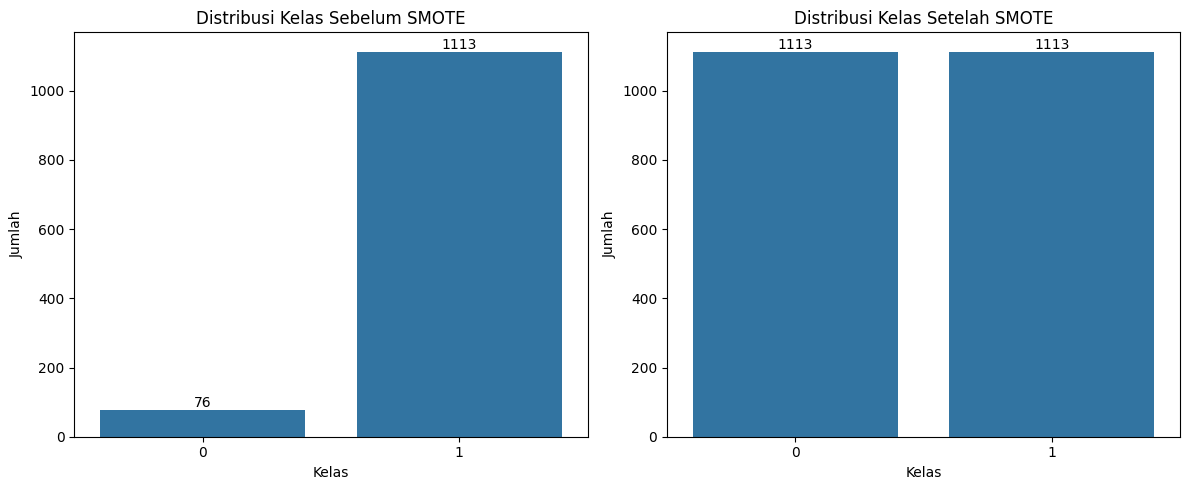

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Visualisasi sebelum SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
before_counts = y.value_counts()
ax = sns.barplot(x=before_counts.index, y=before_counts.values)
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

# Tambahkan angka di atas bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

# 2. Visualisasi setelah SMOTE
plt.subplot(1, 2, 2)
after_counts = y_res.value_counts()
ax = sns.barplot(x=after_counts.index, y=after_counts.values)
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

# Tambahkan angka di atas bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

Top 20 Fitur Terpenting:
                         Fitur  Importance Score
0              SerumCreatinine          0.119981
1                          GFR          0.065299
2                 MuscleCramps          0.043854
3                          BMI          0.038611
4                        Edema          0.029554
5               CholesterolLDL          0.026954
6                       Gender          0.026909
7                      Smoking          0.025276
8                      Itching          0.024638
9   SerumElectrolytesPotassium          0.023138
10                       HbA1c          0.022817
11          AlcoholConsumption          0.022225
12                   Diuretics          0.022223
13          QualityOfLifeScore          0.021732
14              ProteinInUrine          0.021508
15         MedicationAdherence          0.020567
16   FamilyHistoryHypertension          0.020122
17              CholesterolHDL          0.019976
18    CholesterolTriglycerides          0.01

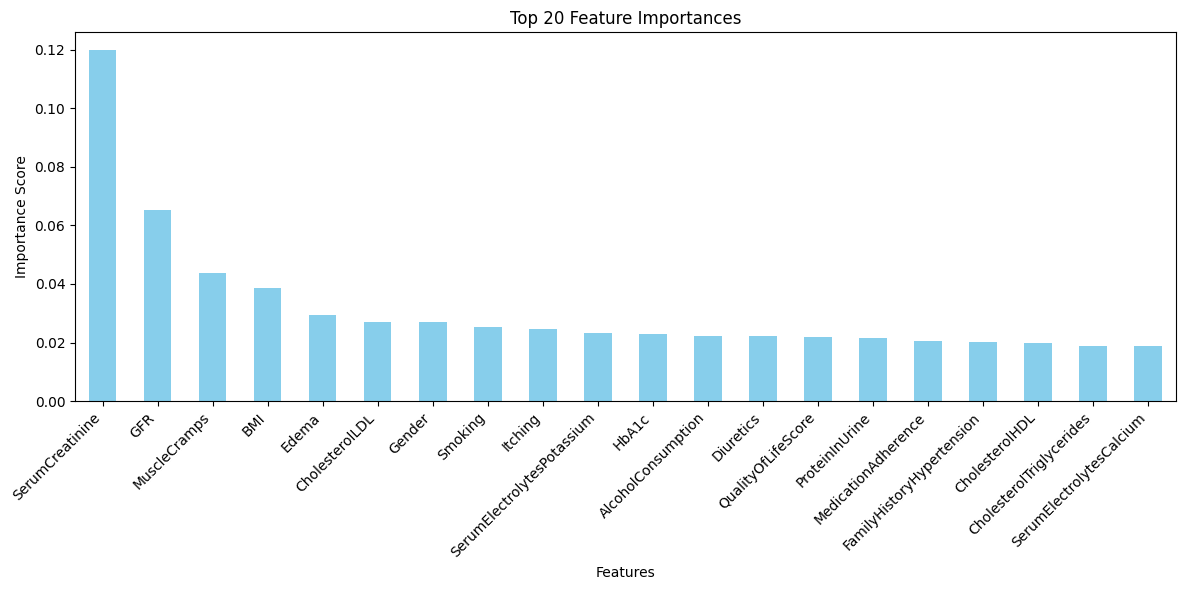

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ambil nilai feature importances dari model Random Forest
feature_importances = clf.feature_importances_
features = X.columns

# Buat Series dan urutkan
importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)

# Ambil 20 fitur teratas
top_20_features = importances.head(20)

# Tampilkan dalam bentuk tabel
top_20_df = pd.DataFrame({
    'Fitur': top_20_features.index,
    'Importance Score': top_20_features.values
})

print("Top 20 Fitur Terpenting:")
print(top_20_df)

# Visualisasi bar chart
plt.figure(figsize=(12, 6))
top_20_features.plot(kind='bar', color='skyblue')
plt.title('Top 20 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


                               Importance
SerumCreatinine                  0.114272
GFR                              0.073037
BMI                              0.048725
Gender                           0.043363
MuscleCramps                     0.033333
Edema                            0.031866
Smoking                          0.030105
CholesterolLDL                   0.027432
Itching                          0.025730
HbA1c                            0.022859
ProteinInUrine                   0.021440
QualityOfLifeScore               0.021053
FamilyHistoryDiabetes            0.020365
SerumElectrolytesSodium          0.020035
CholesterolHDL                   0.019754
SerumElectrolytesCalcium         0.019457
ACR                              0.019337
FastingBloodSugar                0.019286
AlcoholConsumption               0.018857
Statins                          0.018356
FamilyHistoryHypertension        0.018227
CholesterolTriglycerides         0.017818
MedicationAdherence              0

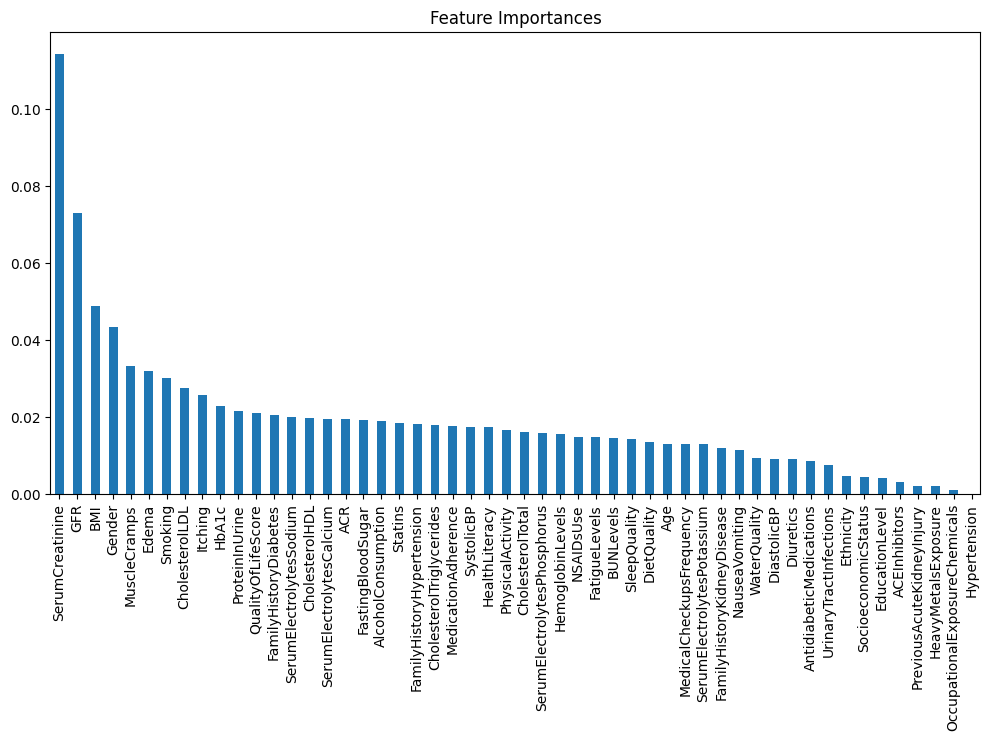

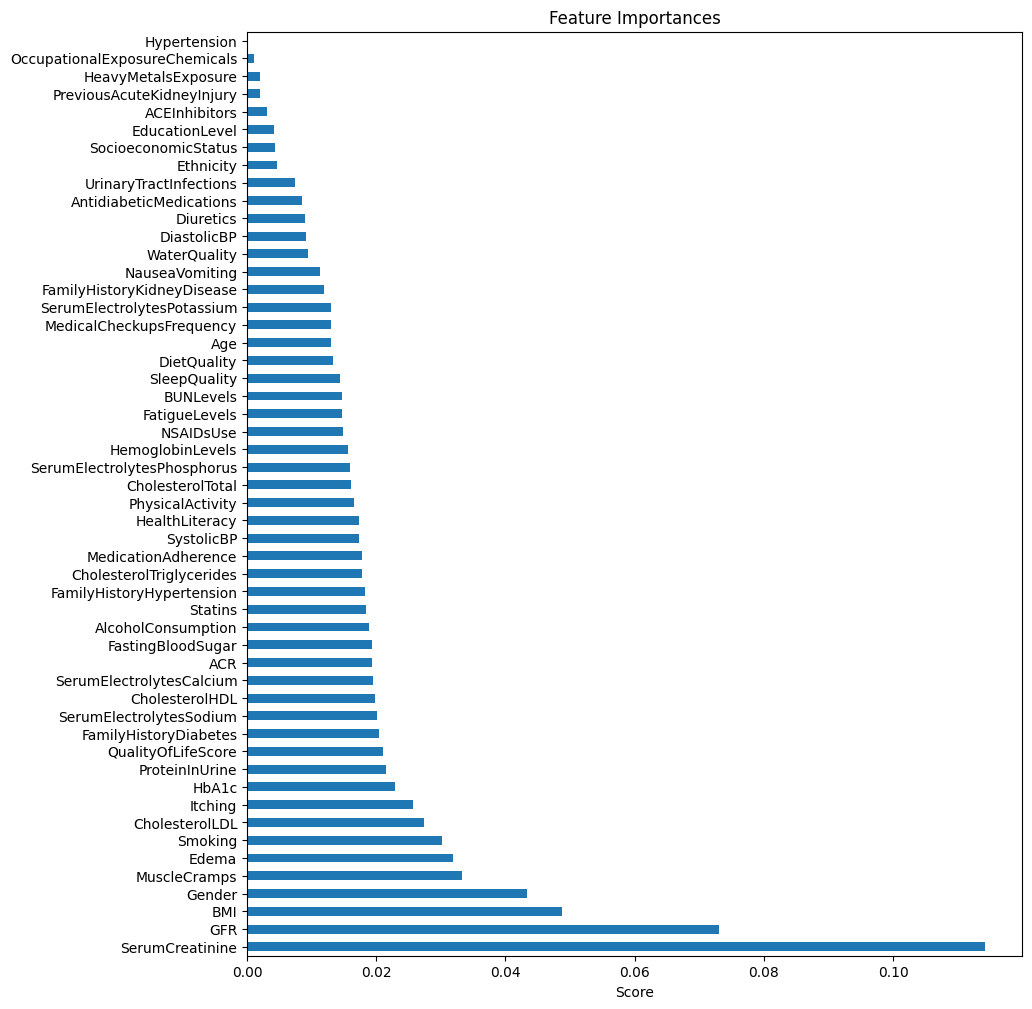

In [ ]:
# Ambil bobot fitur
feature_importances = clf.feature_importances_
importances = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

# Tampilkan sebagai tabel
print(importances.to_frame(name="Importance"))

# Plot
importances.plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importances")
plt.show()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
importances.plot(kind='barh')  # Horizontal bar untuk keterbacaan
plt.title('Feature Importances')
plt.xlabel('Score')
plt.show()

#simpan model

In [ ]:
import joblib

# Misal model yang kamu latih:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Simpan model ke file .pkl
joblib.dump(model, 'model_random_forest.pkl')


['model_random_forest.pkl']

#Sesudah SMOTE

=== Cross-Validation AUC-ROC (Training Set) ===
Mean AUC-ROC (5-fold): 0.998
Semua skor: [0.99919515 0.9972067  0.99886374 0.99346591 0.99876894]

=== Jumlah Data ===
Total data: 1189
Data training: 1780
Data testing: 446

Distribusi kelas di data testing:
Diagnosis
1    230
0    216
Name: count, dtype: int64

=== Confusion Matrix ===
[[214   2]
 [  5 225]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       216
           1       0.99      0.98      0.98       230

    accuracy                           0.98       446
   macro avg       0.98      0.98      0.98       446
weighted avg       0.98      0.98      0.98       446


AUC-ROC di data testing: 0.999


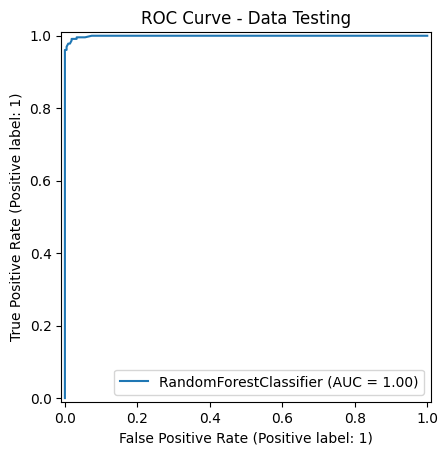

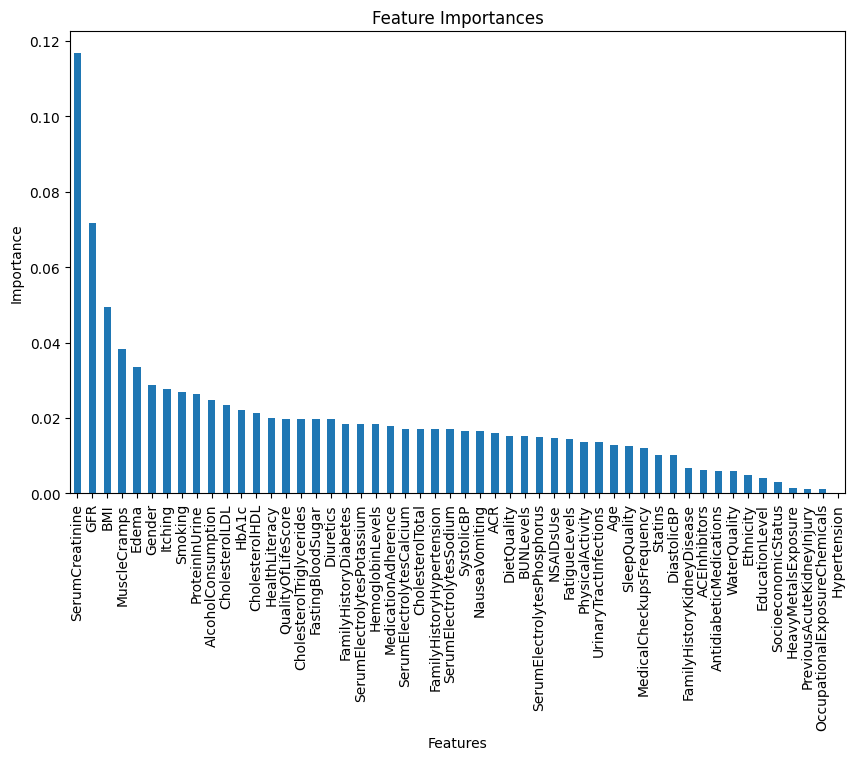

In [ ]:
#  Filter hanya pasien hipertensi
df = df[df['Hypertension'] == 1]

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Penerapan SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res =  smote.fit_resample(X, y)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# initialize and training the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Cross-validation (5-fold AUC-ROC di training set)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')

print("=== Cross-Validation AUC-ROC (Training Set) ===")
print(f"Mean AUC-ROC (5-fold): {np.mean(cv_scores):.3f}")
print(f"Semua skor: {cv_scores}")

# Training final model & prediksi di data testing
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # Probabilitas kelas 1 (sehat)

# Evaluasi hasil
print("\n=== Jumlah Data ===")
print(f"Total data: {len(df)}")
print(f"Data training: {len(X_train)}")
print(f"Data testing: {len(X_test)}")
print("\nDistribusi kelas di data testing:")
print(y_test.value_counts())

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

# print the classification report
print(classification_report(y_test, y_pred))
print(f"\nAUC-ROC di data testing: {roc_auc_score(y_test, y_proba):.3f}")

# ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title('ROC Curve - Data Testing')
plt.show()

# Feature Importances
feature_importances = clf.feature_importances_
features = X.columns
importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Ukuran data uji yang ingin diuji (misal 10% hingga 50%)
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

print("=== Validasi Kinerja Model dengan Berbagai Ukuran Data Uji ===")
for test_size in test_sizes:
    print(f"\n--- Test Size: {int(test_size*100)}% ---")

    # Split ulang data untuk setiap ukuran test
    X_train, X_test, y_train, y_test = train_test_split(
        X_res, y_res, test_size=test_size, random_state=42, stratify=y_res
    )

    # Latih ulang model
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Prediksi
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    # Evaluasi
    auc = roc_auc_score(y_test, y_proba)
    print("AUC-ROC:", auc)
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Classification Report untuk setiap ukuran test
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("="*50)

=== Validasi Kinerja Model dengan Berbagai Ukuran Data Uji ===

--- Test Size: 10% ---
AUC-ROC: 0.9993162805662806

Confusion Matrix:
[[110   2]
 [  2 109]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       112
           1       0.98      0.98      0.98       111

    accuracy                           0.98       223
   macro avg       0.98      0.98      0.98       223
weighted avg       0.98      0.98      0.98       223


--- Test Size: 20% ---
AUC-ROC: 0.9991855858754449

Confusion Matrix:
[[218   5]
 [  5 218]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       223
           1       0.98      0.98      0.98       223

    accuracy                           0.98       446
   macro avg       0.98      0.98      0.98       446
weighted avg       0.98      0.98      0.98       446


--- Test Size: 30% ---
AUC-ROC: 0.998946717343

In [ ]:
# Filter pasien hipertensi
df = df[df['Hypertension'] == 1]

# Fitur dan target
features = [col for col in df.columns if col not in ['Diagnosis']]
X = pd.get_dummies(df[features])
y = df['Diagnosis']

# SMOTE
smote = SMOTE()
X_res, y_res =  smote.fit_resample(X, y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Daftar model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=300, class_weight='balanced', random_state=42)
}

# Evaluasi semua model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    print(f"\n=== {name} ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")


=== Random Forest ===
Confusion Matrix:
[[211   5]
 [  5 225]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       216
           1       0.98      0.98      0.98       230

    accuracy                           0.98       446
   macro avg       0.98      0.98      0.98       446
weighted avg       0.98      0.98      0.98       446

AUC-ROC: 0.9978

=== SVM ===
Confusion Matrix:
[[180  36]
 [ 67 163]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       216
           1       0.82      0.71      0.76       230

    accuracy                           0.77       446
   macro avg       0.77      0.77      0.77       446
weighted avg       0.78      0.77      0.77       446

AUC-ROC: 0.8546

=== Decision Tree ===
Confusion Matrix:
[[205  11]
 [ 39 191]]
Classification Report:
              precision    recall  f1-score   support

        

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from scipy.stats import f_oneway

# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=300, class_weight='balanced', random_state=42)
}

# 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Simpan hasil AUC semua model
auc_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_res, y_res, cv=cv, scoring='roc_auc')
    auc_scores[name] = scores
    print(f"{name}: Mean AUC = {scores.mean():.4f}, All Folds = {scores}")

# Uji ANOVA pada skor AUC-ROC semua model
f_stat, p_value = f_oneway(*auc_scores.values())
print("\n=== Uji ANOVA ===")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("➡️ Terdapat perbedaan yang signifikan antara model (p < 0.05)")
else:
    print("➡️ Tidak terdapat perbedaan yang signifikan antara model (p ≥ 0.05)")


Random Forest: Mean AUC = 0.9981, All Folds = [0.99885379 0.99952531 0.99913142 0.99754575 0.99565709]
SVM: Mean AUC = 0.8396, All Folds = [0.86792415 0.85296732 0.81044722 0.84527128 0.82125399]
Decision Tree: Mean AUC = 0.8796, All Folds = [0.89461883 0.91688886 0.85631035 0.86283481 0.86732921]
KNN: Mean AUC = 0.9486, All Folds = [0.94834    0.94170404 0.97363956 0.94089605 0.938664  ]
Logistic Regression: Mean AUC = 0.9458, All Folds = [0.94719379 0.96059064 0.91738375 0.94677413 0.95713651]

=== Uji ANOVA ===
F-statistic: 57.6841
P-value: 0.0000
➡️ Terdapat perbedaan yang signifikan antara model (p < 0.05)


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import numpy as np

# Gabungkan semua nilai AUC dan label model dalam format yang sesuai
auc_all = []
model_labels = []

for model, scores in auc_scores.items():
    auc_all.extend(scores)
    model_labels.extend([model] * len(scores))

# Tukey HSD
df_auc = pd.DataFrame({'Model': model_labels, 'AUC': auc_all})
tukey = pairwise_tukeyhsd(endog=df_auc['AUC'], groups=df_auc['Model'], alpha=0.05)

# Tampilkan hasil
print(tukey)


             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
      Decision Tree                 KNN   0.0691 0.0001  0.0342  0.1039   True
      Decision Tree Logistic Regression   0.0662 0.0001  0.0313  0.1011   True
      Decision Tree       Random Forest   0.1185    0.0  0.0837  0.1534   True
      Decision Tree                 SVM    -0.04 0.0197 -0.0749 -0.0052   True
                KNN Logistic Regression  -0.0028 0.9992 -0.0377   0.032  False
                KNN       Random Forest   0.0495 0.0032  0.0146  0.0844   True
                KNN                 SVM  -0.1091    0.0 -0.1439 -0.0742   True
Logistic Regression       Random Forest   0.0523 0.0019  0.0175  0.0872   True
Logistic Regression                 SVM  -0.1062    0.0 -0.1411 -0.0714   True
      Random Forest                 SVM  -0.1586    